In [160]:
import os
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [161]:
raw = pd.read_csv('../datasets/countryriskdata.csv',encoding='gbk',skiprows=1)

In [162]:
raw.shape

(122, 7)

In [11]:
raw.describe()

,Corruption,Peace,Legal,GDP Growth
count,122.000000,122.000000,122.000000,122.000000
mean,46.237705,2.003730,5.598861,2.372566
std,19.126397,0.447826,1.487328,3.241424
min,14.000000,1.192000,2.728000,-18.000000
25%,31.250000,1.684750,4.571750,1.432250
50%,40.000000,1.969000,5.274000,2.496000
75%,58.750000,2.280500,6.476750,4.080000
max,90.000000,3.399000,8.633000,7.958000


In [13]:
abs(raw.corr())

C:\Users\zyc\AppData\Local\Temp/ipykernel_9676/3077505931.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(raw.corr())


,Corruption,Peace,Legal,GDP Growth
Corruption,1.000000,0.700477,0.923589,0.102513
Peace,0.700477,1.000000,0.651961,0.199855
Legal,0.923589,0.651961,1.000000,0.123440
GDP Growth,0.102513,0.199855,0.123440,1.000000


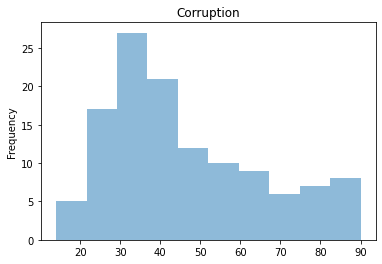

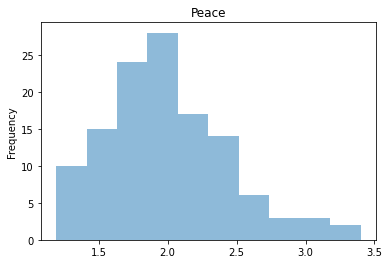

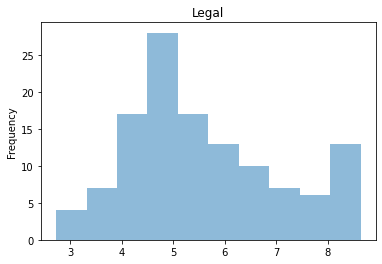

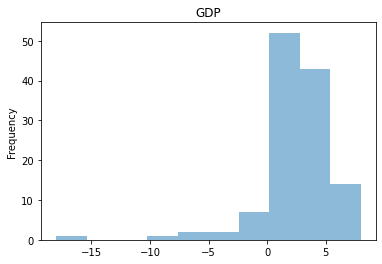

In [18]:
plt.figure(1)
raw['Corruption'].plot(kind='hist',alpha=.5,title='Corruption')
plt.figure(2)
raw['Peace'].plot(kind='hist',alpha=.5,title='Peace')
plt.figure(3)
raw['Legal'].plot(kind='hist',alpha=0.5,title='Legal')
plt.figure(4)
raw['GDP Growth'].plot(kind='hist',alpha=0.5,title='GDP')
plt.show()

由于腐败和法律高度相关，我们去掉了Courabsorption变量，即我们选择了三个特征进行分析，即和平、法律和GDP Grwoth。让我们规范化所有特征，有效地使它们具有同等的权重。

In [104]:
X = raw[['Peace','Legal','GDP Growth']]
X = (X-X.mean())/X.std()

### 转折图法

In [105]:
Ks = range(2,10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

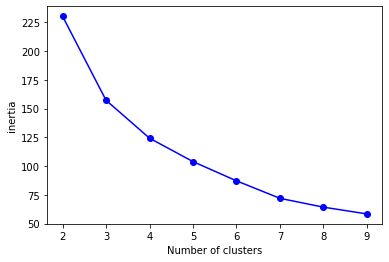

In [106]:
fig = plt.figure()
plt.plot(Ks,inertia,'-bo')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

### k-means with k=3

In [107]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [108]:
kmeans.inertia_

157.31661757321712

In [109]:
kmeans.cluster_centers_

array([[ 2.65685249e-01, -4.51167794e-01,  3.63120857e-01],
       [-9.69783061e-01,  1.17216616e+00,  1.73192818e-03],
       [ 1.39208980e+00, -1.04170733e+00, -1.79449174e+00]])

In [110]:
kmeans.labels_

array([0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 0])

In [111]:
y = kmeans.labels_

In [175]:
norm = clrs.Normalize(vmin=0.,vmax=y.max()+0.8)

masked_array(data=[ 0.35714286,  0.71428571,  1.07142857, 35.71428571],
             mask=False,
       fill_value=1e+20)

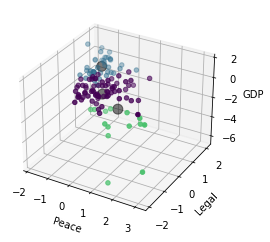

In [112]:
norm = clrs.Normalize(vmin=0.,vmax=y.max()+0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c = cmap(norm(y)),marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:,0],centers[:,1],c='black',s=100,alpha=.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP')
plt.show()

In [95]:
import plotly.express as px


In [114]:
X['label'] = y
y = X.label.astype('str')

In [115]:
X= pd.concat([X,pd.DataFrame(data=centers,columns=['Peace','Legal','GDP Growth'])],axis=0)

In [117]:
centers = kmeans.cluster_centers_

In [120]:
y = y.append(pd.Series(['x','x','x']))

C:\Users\zyc\AppData\Local\Temp/ipykernel_9676/95545721.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



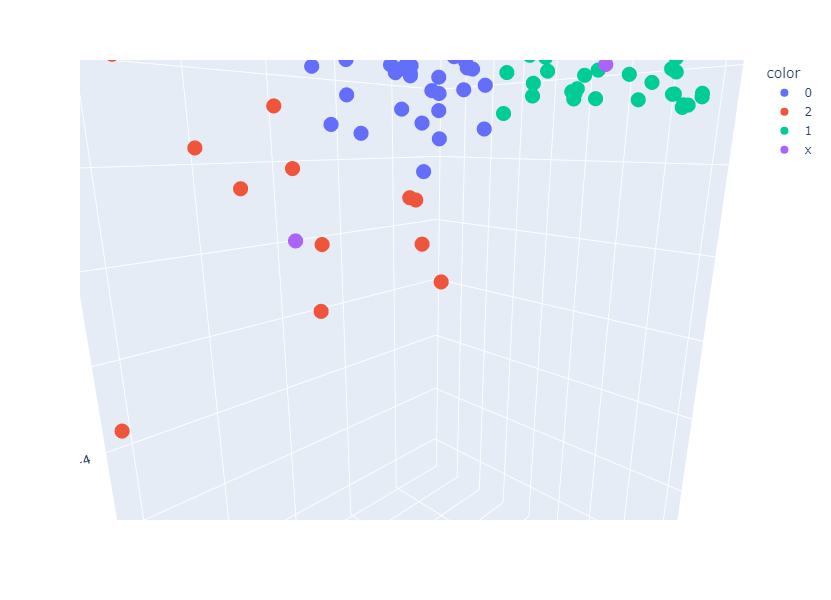

In [121]:
fig = px.scatter_3d(X,x='Peace',y = 'Legal',z = 'GDP Growth',color=y,width=1000, height=600)
fig.show()

### 3Dto2D

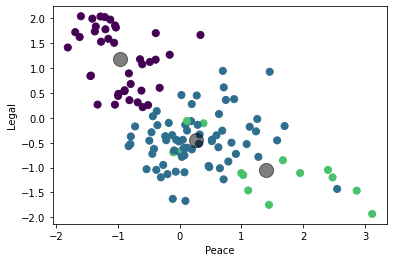

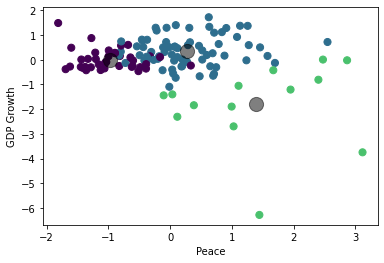

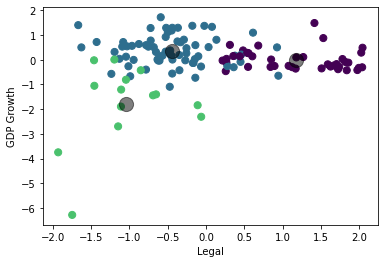

In [156]:
figs = [(0,1),(0,2),(1,2)]
labels = ['Peace','Legal','GDP Growth']
X = raw[labels]
X = (X-X.mean(axis=0))/X.std(axis=0)
kmean = KMeans(3).fit(X)
y = kmean.labels_
centers = kmean.cluster_centers_

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]],X.iloc[:,figs[i][1]],c=cmap(norm(y)),s=50)
    plt.scatter(centers[:,figs[i][0]],centers[:,figs[i][1]],c='black',s=200,alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])
plt.show()
                      

In [166]:
# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

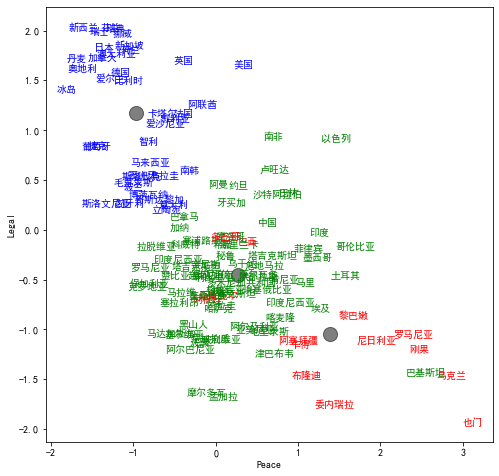

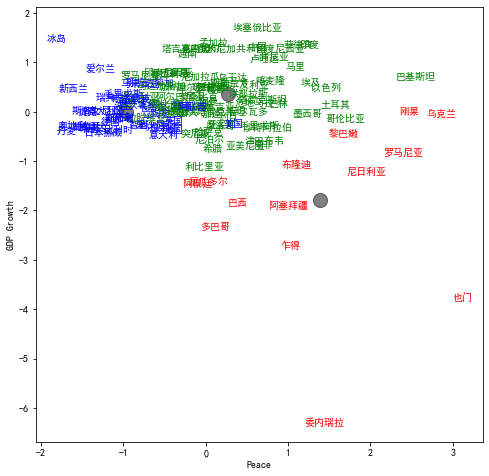

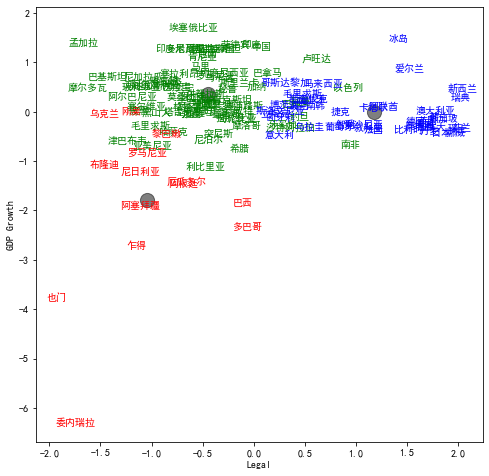

In [167]:
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j,x_1],X.iloc[j,x_2],raw['Abbrev_CN'].iloc[j],
                 color=colors[y[j]],weight='semibold',
                 horizontalalignment='center',
                 verticalalignment='center')
        plt.xlabel(labels[x_1])
        plt.ylabel(labels[x_2])
    plt.show()

### 轮廓分析

In [168]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

In [171]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels)
    print(f"For N->{n_clusters:3} Silhouette_score->{silhouette_avg:.4f}")

For N->  2 Silhouette_score->0.3630
For N->  3 Silhouette_score->0.3876
For N->  4 Silhouette_score->0.3704
For N->  5 Silhouette_score->0.3094
For N->  6 Silhouette_score->0.3028
For N->  7 Silhouette_score->0.3149
For N->  8 Silhouette_score->0.3211
For N->  9 Silhouette_score->0.2920
For N-> 10 Silhouette_score->0.3048
